In [310]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
wc_df=pd.read_csv(r"C:\Users\FW154GQ\OneDrive - EY\Desktop\Personal\Datasets\ICC Mens T20 Worldcup.csv")

In [312]:
wc_df['Place']=wc_df['Venue'].str.split(",").str[1]
columns=wc_df.columns.tolist()

In [313]:
columns

['Match No.',
 'Date',
 'Venue',
 '1st Team',
 '2nd Team',
 'Stage',
 'Toss Winning',
 'Toss Decision',
 'First Innings Score',
 'Fall of wickets First Innings',
 'Second Innings Score',
 'Fall of wickets Second Innings',
 'Winners',
 'Method',
 'Won by',
 'Winning Margin',
 'Top Scorer',
 'Highest Score',
 'Best Bowler',
 'Best Bowler Figure(Wickets Taken)',
 'Best Bowler Figure(Runs Recieved)',
 'Player Of The Match',
 'Place']

In [314]:
cols=columns[0:3]+columns[-1:]+columns[3:len(columns)-1]

In [315]:
wc_df=wc_df[cols]

In [316]:
non_washedout=wc_df[wc_df['First Innings Score']!='Rain']

In [317]:
non_washedout['First Innings Score']=non_washedout['First Innings Score'].astype('int32')

C:\Users\FW154GQ\AppData\Local\Temp\ipykernel_42132\2897764420.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df[5:6]

,Match No.,Date,Venue,Place,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
5,6th,"Tuesday,June 4,2024","Kensington Oval, Bridgetown, Barbados",Bridgetown,Scotland,England,Group B,Scotland,Batting,90,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain


In [92]:
df=df[df['Winners']!='Rain']

In [322]:
winners=df.groupby('Winners').size().sort_values(ascending=False).reset_index(name='No. of wins')
winners

,Winners,No. of wins
0,India,8
1,South Africa,8
2,Afghanistan,6
3,Australia,5
4,England,4
5,West Indies,4
6,Bangladesh,3
7,New Zealand,2
8,Pakistan,2
9,Scotland,2


In [324]:
px.bar(winners,x='Winners',y='No. of wins',title='Matches won by each team',color='Winners')

ValueError: Plotly Express cannot process wide-form data with columns of different type.

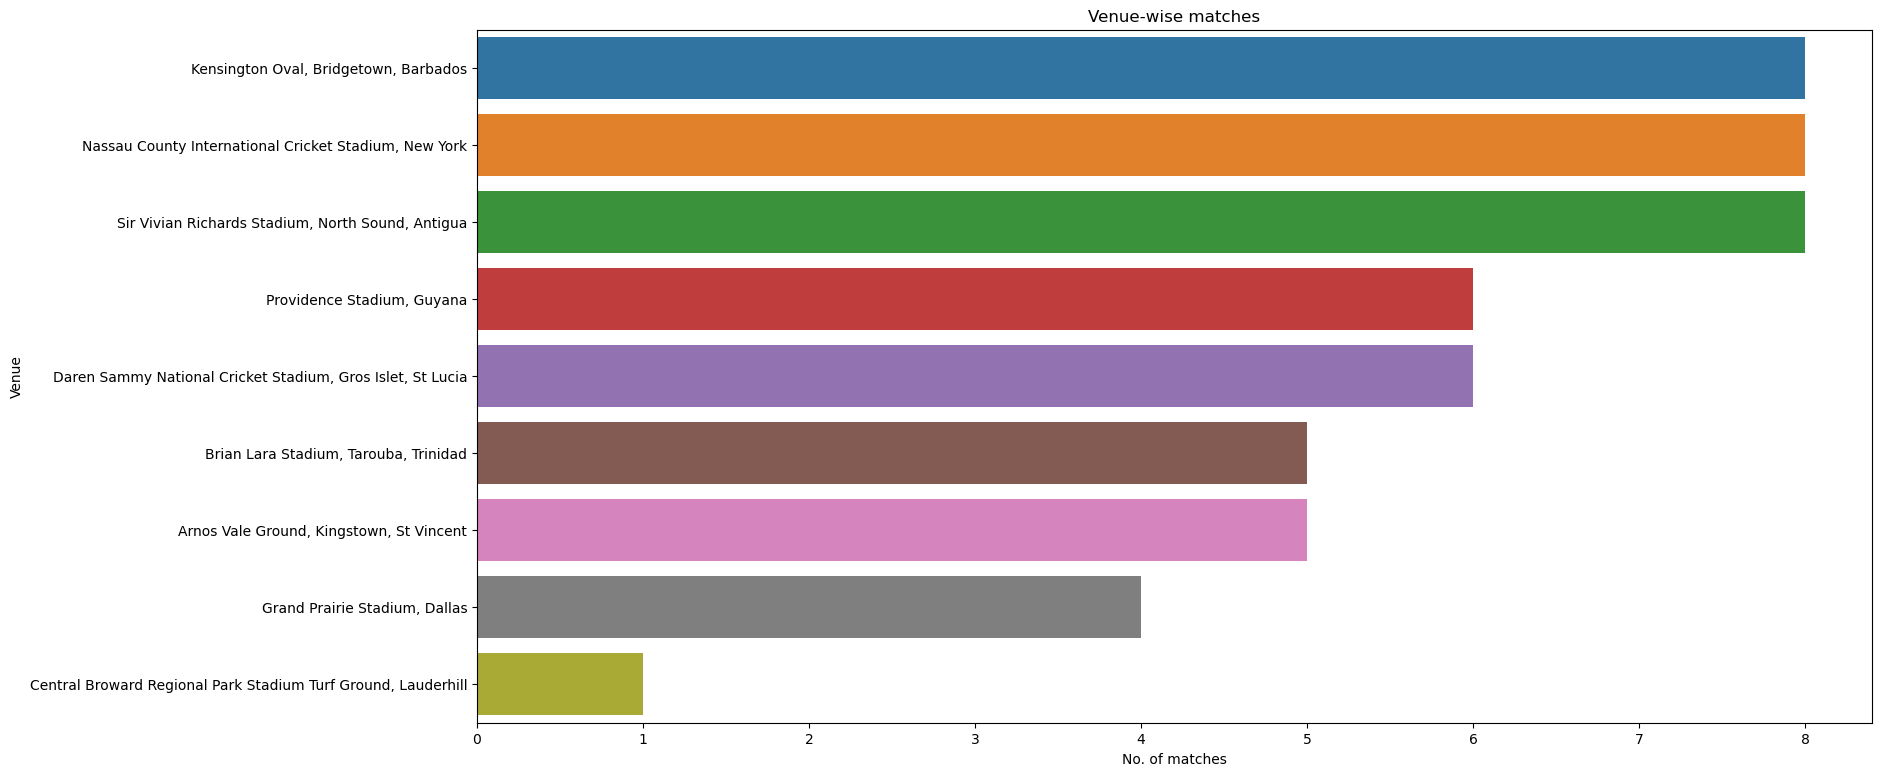

In [159]:
plt.figure(figsize=(18,9))
sns.countplot(df,order=df['Venue'].value_counts().index,y='Venue')
plt.xlabel("No. of matches")
plt.title('Venue-wise matches')
plt.show()

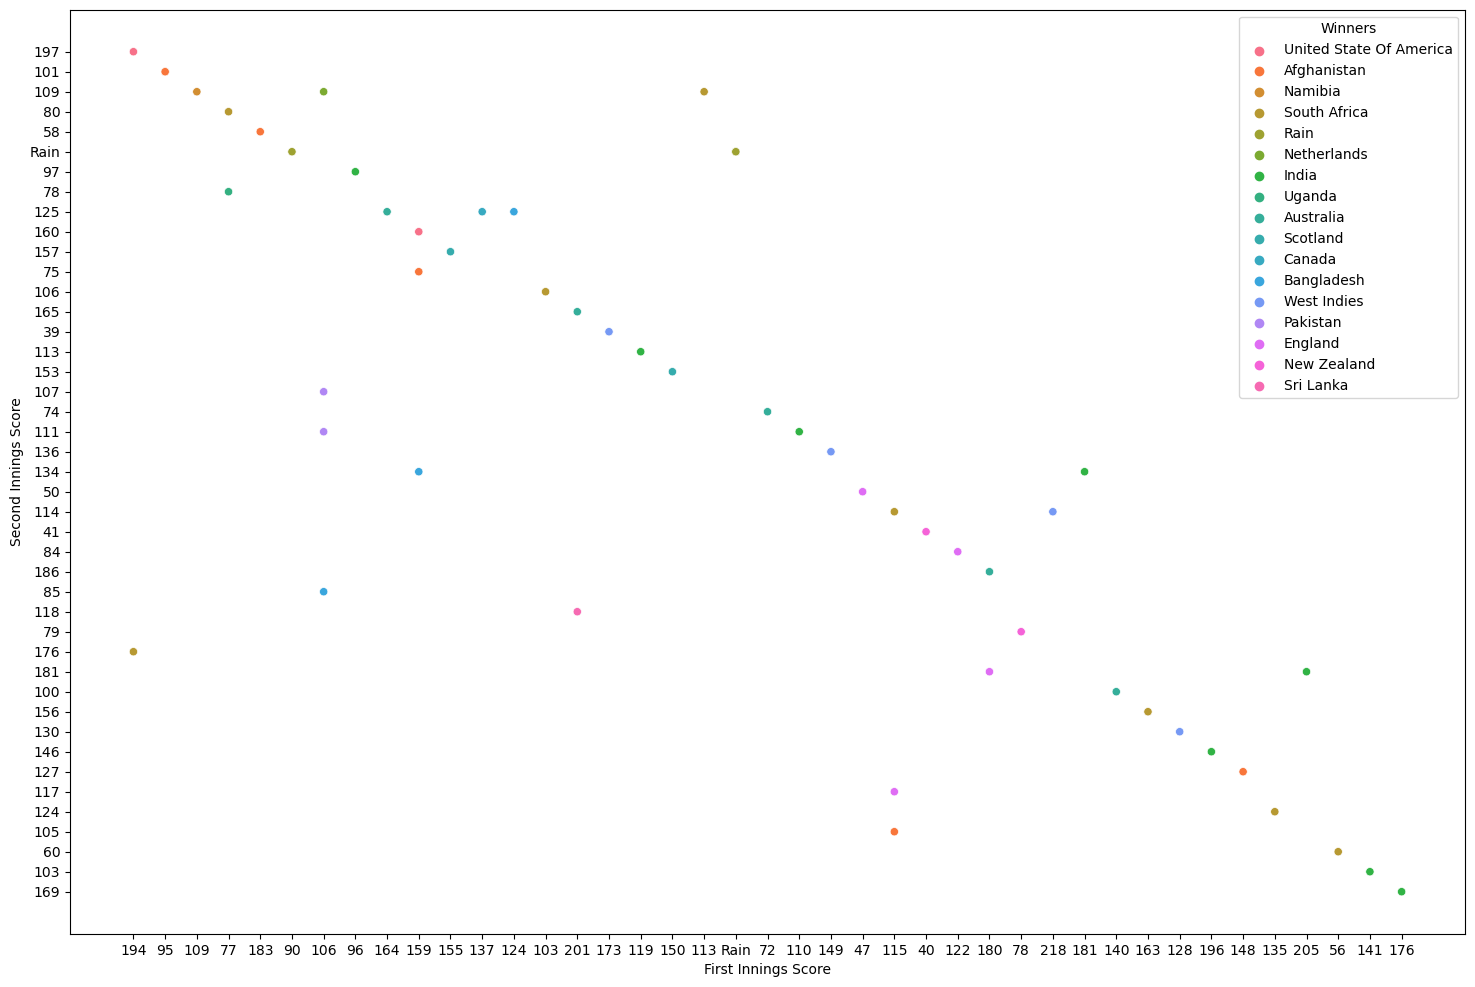

In [309]:
plt.figure(figsize=(18,12))
sns.scatterplot(wc_df,x='First Innings Score',y='Second Innings Score',hue='Winners')
plt.show()

In [190]:
margin_venue=df.groupby('Venue')['Winning Margin'].mean().round(2).sort_values(ascending=False)

In [210]:
fig=px.bar(margin_venue,x=margin_venue.values,title='Average Winning Margin at each venue',width=1000,height=500)
fig.show()

<Axes: xlabel='Winning Margin', ylabel='Count'>

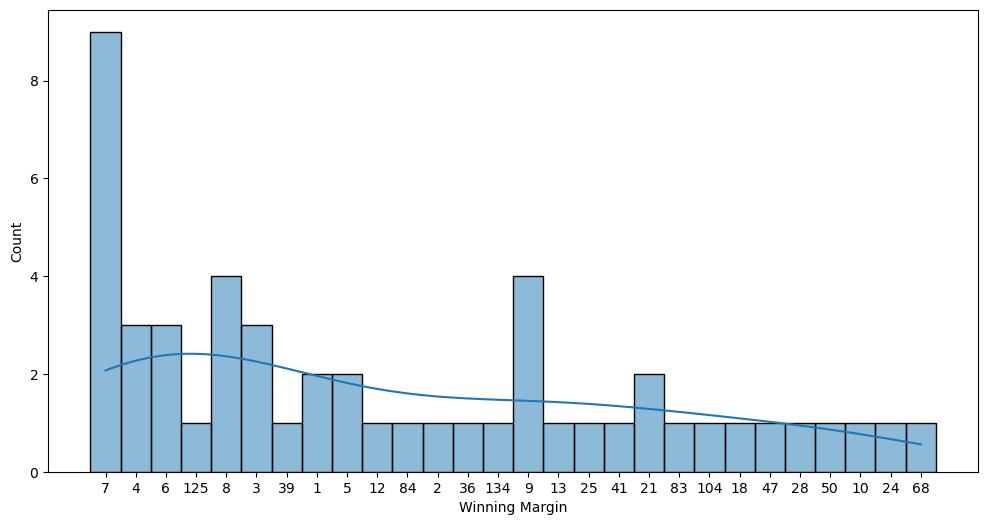

In [216]:
wc_df=wc_df[wc_df['Winning Margin']!='Rain']
plt.figure(figsize=(12,6))
sns.histplot(wc_df,x='Winning Margin',bins=10,kde=True)

In [232]:
wc_df.head()

,Match No.,Date,Venue,Place,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Dallas,Canada,United State Of America,Group A,United State Of America,Fielding,194,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Guyana,Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Bridgetown,Oman,Namibia,Group B,Namibia,Fielding,109,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
3,4th,"Monday,June 3,2024","Nassau County International Cricket Stadium, N...",New York,Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,...,South Africa,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje
4,5th,"Monday,June 3,2024","Providence Stadium, Guyana",Guyana,Afghanistan,Uganda,Group C,Uganda,Fielding,183,...,Afghanistan,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi


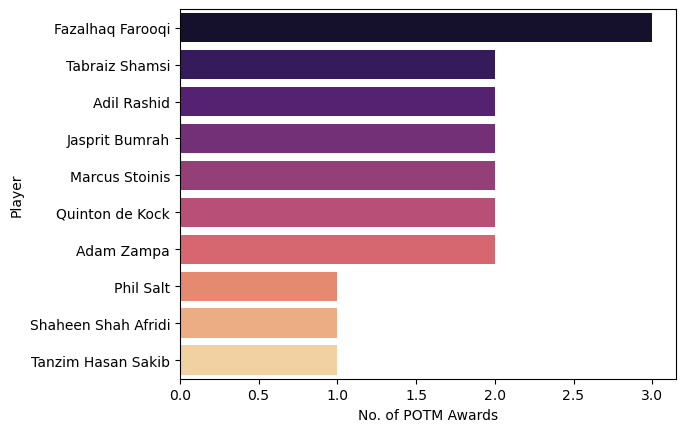

In [231]:
sns.countplot(wc_df,order=wc_df['Player Of The Match'].value_counts().head(10).index,y='Player Of The Match',palette='magma')
plt.xlabel("No. of POTM Awards")
plt.ylabel("Player")
plt.show()

In [236]:
wc_df['First Innings Score']=wc_df['First Innings Score'].astype('int32')

C:\Users\FW154GQ\AppData\Local\Temp\ipykernel_42132\3813220396.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [240]:
grounds=wc_df.groupby('Venue')['First Innings Score'].mean().sort_values(ascending=False).round(2)

In [244]:
px.bar(grounds,x=grounds.values,y=grounds.index,title='Avg First Innings Total')

In [258]:
runs=wc_df[wc_df['Won by']=='Runs']
wickets=wc_df[wc_df['Won by']=='Wickets']

In [270]:
runs_won=runs['Winning Margin'].mean().round(0).astype('int32')
wickets_won=wickets['Winning Margin'].mean().round(0).astype('int32')
print("The Average Match was won by",runs_won,"runs")
print("The Average Match was won by",wickets_won,"wickets")

The Average Match was won by 39 runs
The Average Match was won by 6 wickets


In [280]:
wc_df['Toss Impact']=np.where(wc_df['Toss Winning']==wc_df['Winners'],'Won by Toss Winner','Won by Toss Loser')

C:\Users\FW154GQ\AppData\Local\Temp\ipykernel_42132\351428630.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
toss_results=wc_df.groupby('Toss Impact').size().reset_index(name='# of Wins')

In [299]:
px.bar(toss_results,x='Toss Impact',y='# of Wins',width=600,height=400,title='Impact of winning the Toss')